<a href="https://colab.research.google.com/github/DaryaJavadi/Machine_learning_projects/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mathchi/diabetes-data-set")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'diabetes-data-set' dataset.
Path to dataset files: /kaggle/input/diabetes-data-set


# Task 1 – Load and Inspect the Dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv(f"{path}/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Task 2 – Missing Value Analysis

In [ ]:
(df == 0).sum()
# -> True olanlari hesablayir

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


In [ ]:
cols_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df["Glucose_BMI"] = df["Glucose"] * df["BMI"]
df["Age_BMI"] = df["Age"] * df["BMI"]

# Task 3 – Exploratory Data Analysis (EDA)

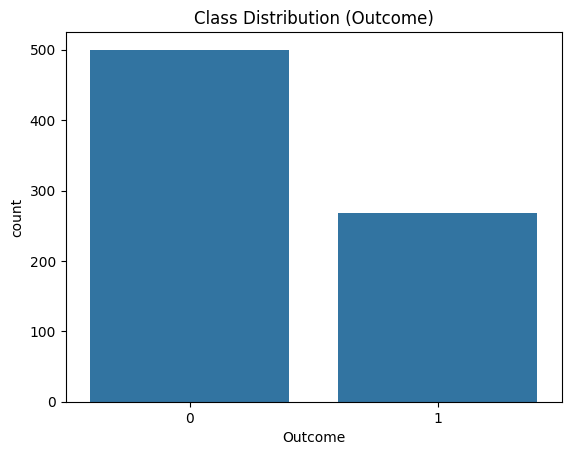

In [ ]:
# Target Variable Analysis
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Outcome", data=df)
plt.title("Class Distribution (Outcome)")
plt.show()

In [ ]:
df["Outcome"].value_counts(normalize=True)

,proportion
Outcome,
0,0.651042
1,0.348958


In [ ]:
# Dataset is slightly imbalanced

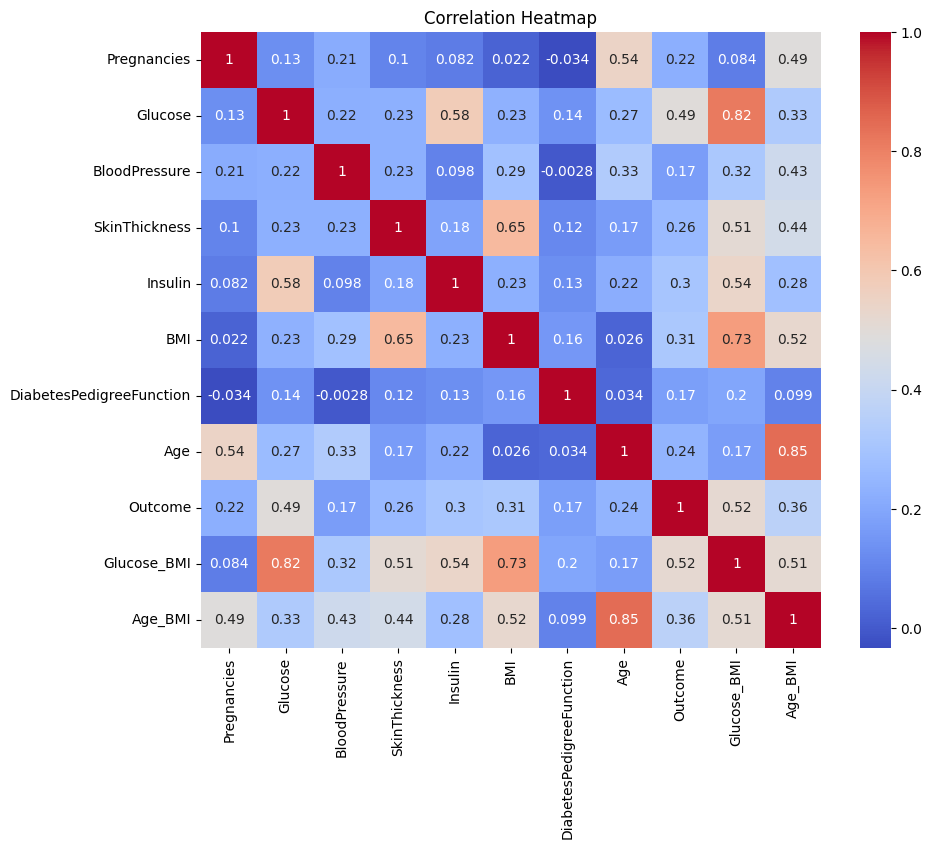

In [ ]:
# Feature Relationships
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
corr["Outcome"].sort_values(ascending=False)

,Outcome
Outcome,1.000000
Glucose_BMI,0.519287
Glucose,0.494650
Age_BMI,0.362630
BMI,0.313680
Insulin,0.303454
SkinThickness,0.259491
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844


In [ ]:
# correlations = df.corr()["Outcome"].abs()
# threshold = 0.05


# low_corr_cols = correlations.drop("Outcome")[correlations.drop("Outcome") < threshold].index.tolist()

# print("Low correlation columns:", low_corr_cols)

# df_reduced = df.drop(columns=low_corr_cols)

Low correlation columns: []


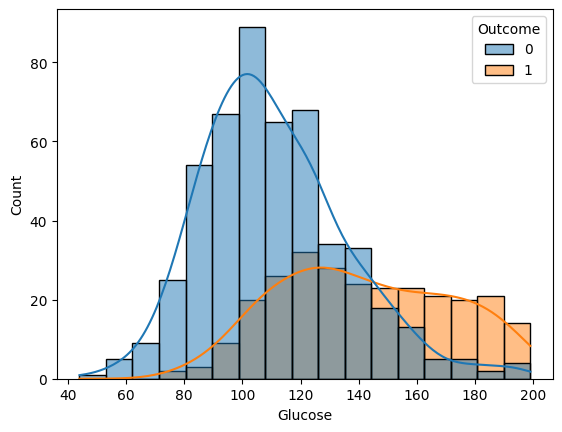

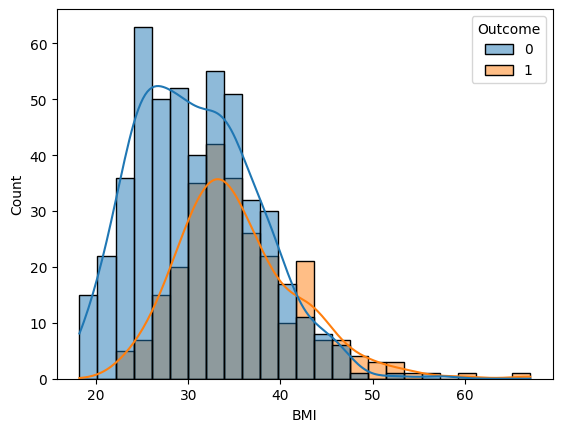

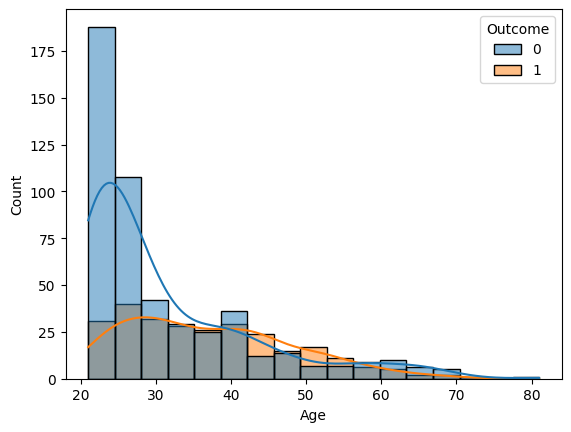

In [ ]:
# Feature-Level Analysis
sns.histplot(data=df, x="Glucose", hue="Outcome", kde=True)
plt.show()

sns.histplot(data=df, x="BMI", hue="Outcome", kde=True)
plt.show()

sns.histplot(data=df, x="Age", hue="Outcome", kde=True)
plt.show()

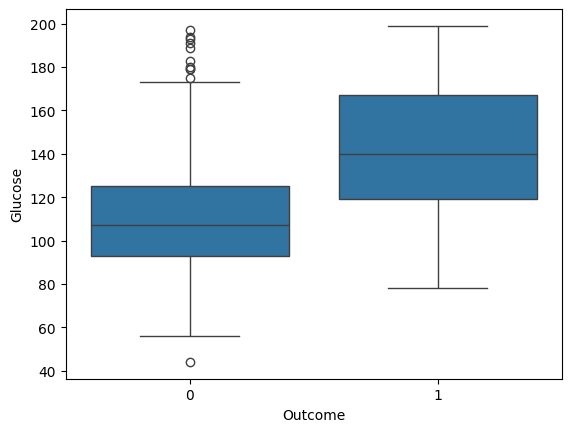

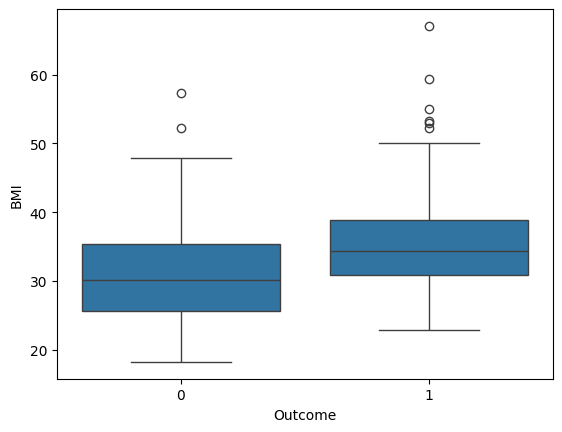

In [ ]:
sns.boxplot(x="Outcome", y="Glucose", data=df)
plt.show()

sns.boxplot(x="Outcome", y="BMI", data=df)
plt.show()

# Task 4 – Data Preprocessing

In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Task 5 – Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Task 6 – Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_pipeline = Pipeline([
    ("preprocessing", num_pipeline),
    ("classifier", LogisticRegression(
        max_iter=1000,
        class_weight="balanced"
    ))
])

In [ ]:
log_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [ ]:
y_pred = log_reg_pipeline.predict(X_test)
y_pred_proba = log_reg_pipeline.predict_proba(X_test)

# Task 7 – Model Evaluation

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    log_loss
)

accuracy_score(y_test, y_pred)

0.7272727272727273

In [ ]:
confusion_matrix(y_test, y_pred)

array([[74, 26],
       [16, 38]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       100
           1       0.59      0.70      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154



In [ ]:
log_loss(y_test, y_pred_proba)

0.5444445491119578

# Task 8 – Regularization Comparison

In [ ]:
models = {
    "L2 (Ridge)": LogisticRegression(penalty="l2", solver="lbfgs", max_iter=1000),
    "L1 (Lasso)": LogisticRegression(penalty="l1", solver="liblinear", max_iter=1000),
    "ElasticNet": LogisticRegression(
        penalty="elasticnet",
        solver="saga",
        l1_ratio=0.5,
        max_iter=1000
    )
}

In [ ]:
from sklearn.metrics import accuracy_score, log_loss

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ("preprocessing", num_pipeline),
        ("classifier", model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "LogLoss": log_loss(y_test, y_proba)
    }

results

{'L2 (Ridge)': {'Accuracy': 0.7077922077922078, 'LogLoss': 0.5128811088721542},
 'L1 (Lasso)': {'Accuracy': 0.7077922077922078, 'LogLoss': 0.5139921548116813},
 'ElasticNet': {'Accuracy': 0.7142857142857143, 'LogLoss': 0.5135379132807798}}

# Task 9 – Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

cv_accuracy = cross_val_score(
    log_reg_pipeline,
    X,
    y,
    cv=5,
    scoring="accuracy"
)

cv_logloss = cross_val_score(
    log_reg_pipeline,
    X,
    y,
    cv=5,
    scoring="neg_log_loss"
)

In [ ]:
cv_accuracy.mean(), -cv_logloss.mean()

(np.float64(0.7514132925897632), np.float64(0.5099113991631088))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ("preprocessing", num_pipeline),
    ("classifier", RandomForestClassifier(
        n_estimators=200,
        max_depth=5,
        random_state=42,
        class_weight="balanced"
    ))
])

rf_pipeline.fit(X_train, y_train)

y_pred = rf_pipeline.predict(X_test)
y_proba = rf_pipeline.predict_proba(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Log Loss:", log_loss(y_test, y_proba))

Accuracy: 0.7402597402597403
Confusion Matrix:
 [[74 26]
 [14 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.79       100
           1       0.61      0.74      0.67        54

    accuracy                           0.74       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.76      0.74      0.74       154

Log Loss: 0.505771171519873
